In [1]:
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names 
  return class_names
  print(class_names)

In [2]:
class_names = get_class_names_from_folder(directory="Data Main/test/")
print(class_names)
print(type(class_names))

['Grassy' 'Marshy' 'Rocky' 'Sandy']
<class 'numpy.ndarray'>


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

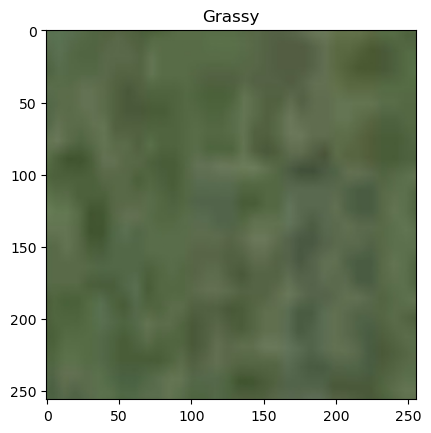

In [4]:
def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
visualize_random_image("Data Main/train/", "Grassy")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="Data Main/train",
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="Data Main/test",
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="Data Main/val",
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode="categorical")

Found 31571 images belonging to 4 classes.
Found 6769 images belonging to 4 classes.
Found 6765 images belonging to 4 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [8]:
import cv2
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from random import randint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
def create_model():
    
    with tf.device('/gpu:0'):
    
        input_layer = layers.Input(shape=(256,256, 3), name='input') 
        x = layers.BatchNormalization()(input_layer)

        x = layers.Conv2D(filters=64, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_1')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_1')(x)
        x = layers.Dropout(0.1, name='dropout_1')(x)

        x = layers.Conv2D(filters=128, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_2')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_2')(x)
        x = layers.Dropout(0.1, name='dropout_2')(x)

        x = layers.Conv2D(filters=256, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_3')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_3')(x)
        x = layers.Dropout(0.1, name='dropout_3')(x)

        x = layers.Conv2D(filters=512, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_4')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_4')(x)
        x = layers.Dropout(0.1, name='dropout_4')(x)

        x = layers.Conv2D(filters=1024, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_5')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_5')(x)
        x = layers.Dropout(0.1, name='dropout_5')(x)
        

        x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)
        x = layers.BatchNormalization()(x)
       
        x = layers.Dense(128,activation='relu')(x)
        
        output = layers.Dense(units=4, 
                              activation='softmax', 
                              name='output')(x)


        model = Model (input_layer, output)    
        model.compile(optimizer='adam', 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])

    return model

model = create_model()

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                             

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=15,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/15
  9/987 [..............................] - ETA: 54:40 - loss: 0.4363 - accuracy: 0.6285

In [12]:
model.evaluate(test_data)

212/212 [==============================] - 185s 877ms/step - loss: 0.1508 - accuracy: 0.9211


[0.15082000195980072, 0.9211109280586243]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Rocky')

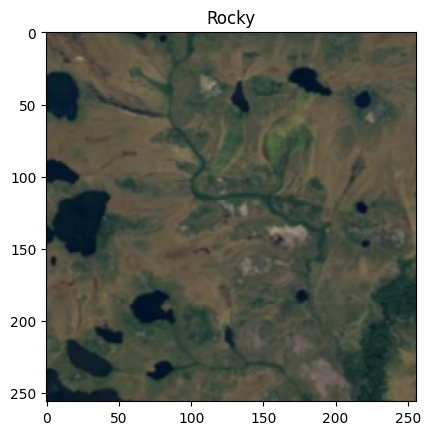

In [16]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("eu.png", 256)
image = image[:,:,:3]
pred = model.predict(tf.expand_dims(image, axis=0))
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])

In [17]:

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

In [18]:
from joblib import Parallel, delayed
import joblib

In [20]:
joblib.dump(model, 'cnn_terrain_detection_18_09.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('cnn_terrain_detection_18_09.pkl')

This is for running

In [1]:
from joblib import Parallel, delayed
import joblib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = joblib.load('cnn_terrain_detection_18_09.pkl')

In [7]:
model.save('gfgModel.h5')

In [14]:
from tensorflow.keras.models import load_model
savedModel=load_model('gfgModel.h5')

1/1 [==============================] - 0s 23ms/step
[[1.2186041e-34 1.1472137e-16 1.0000000e+00 4.2256405e-28]]
1.2186041e-34
1.1472137e-16
1.0
4.2256405e-28


Text(0.5, 1.0, 'Rocky')

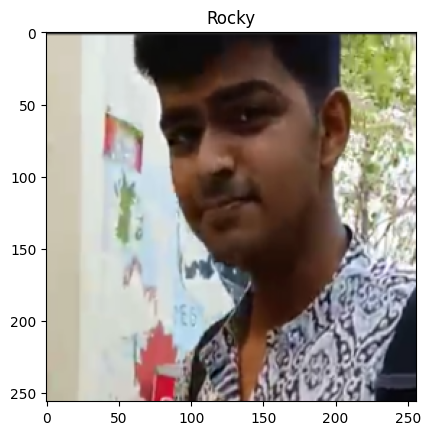

In [24]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("uploads/vb.png", 256)
image = image[:,:,:3]
pred = model.predict(tf.expand_dims(image, axis=0))
print(pred)
print(pred[0][0])
print(pred[0][1])


print(pred[0][2])
print(pred[0][3])
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])

In [25]:
import pickle
filename="model.sav"
pickle.dump(model,open(filename,'wb'))